In [ ]:
import tensorflow as tf

#We need to import the following
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
#Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# the data is only 2D! make it 60000 * 28 * 28 * 1
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
from typing import Sized
# Build the model using the functional API
# 32 - filter number (changes with each conv layer)
# When we go from input layer to first ouput the depth is 1
# When we go from first to second conv - the depth is 32
# When we go from second to third conv - the depth is 64
# When we go from third to fourth conv - the depth is 128
# 2,2 - filter Size
# stride - 2
# padding = same (no padding)
# Stage1
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu', padding='same')(x)

#Stage2
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049

In [ ]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 26s 9ms/step - loss: 0.4334 - accuracy: 0.8423 - val_loss: 0.3237 - val_accuracy: 0.8777
Epoch 2/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2911 - accuracy: 0.8921 - val_loss: 0.2830 - val_accuracy: 0.8933
Epoch 3/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2441 - accuracy: 0.9089 - val_loss: 0.2600 - val_accuracy: 0.9063
Epoch 4/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2125 - accuracy: 0.9209 - val_loss: 0.2413 - val_accuracy: 0.9097
Epoch 5/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1849 - accuracy: 0.9313 - val_loss: 0.2511 - val_accuracy: 0.9153
Epoch 6/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1629 - accuracy: 0.9392 - val_loss: 0.2556 - val_accuracy: 0.9121
Epoch 7/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1439 - accuracy: 0.9461 - val_loss: 0.2601 - val

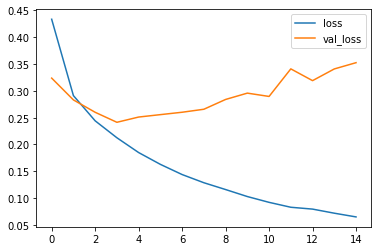

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

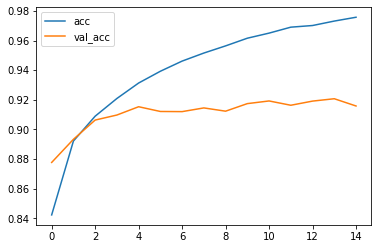

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,y_pred)
print("               Predicted Label")
print(cm)

               Predicted Label
[[895   1  21   9   5   1  56   0  12   0]
 [  0 990   0   5   1   0   2   0   2   0]
 [ 20   1 839   6  69   0  63   0   2   0]
 [  9   6  13 918  35   0  18   0   1   0]
 [  0   0  37   9 889   0  64   0   1   0]
 [  0   0   0   0   0 989   0   6   1   4]
 [132   3  44  17  63   0 734   0   7   0]
 [  0   0   0   0   0  18   0 949   0  33]
 [  2   1   2   0   1   2   3   0 989   0]
 [  1   0   0   0   0  12   0  21   0 966]]


In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

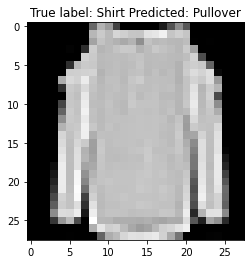

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]));